# Feature engeneering

In [241]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from scipy.stats import boxcox 

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['figure.figsize'] = (20, 15)
from IPython.display import Image, SVG, display

In [242]:
def import_data(name):
        return pd.read_csv('../data/'+ name +'.csv', header=None)

In [259]:
x_train = import_data('x_train')
y_train = import_data('y_train')
x_val = import_data('x_validation')
y_val = import_data('y_validation')
x_test = import_data('x_test')

In [260]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
scaler.transform(x_train)
scaler.transform(x_val)
scaler.transform(x_test)

array([[ 0.68175786, -1.04127011,  0.29667494, ...,  0.46257261,
        -1.16489198,  1.50973193],
       [-1.0184001 , -1.19653919,  0.67990464, ..., -0.78882241,
         0.36220753,  0.24500916],
       [-0.34250901, -0.24978444,  0.53025689, ..., -0.52701254,
         0.65633797,  0.12388937],
       ..., 
       [ 0.4573613 , -0.43761255,  0.58521471, ..., -0.08127109,
        -0.77023686,  1.71760862],
       [-0.85417947, -1.72119813, -0.56222144, ..., -0.19664121,
        -0.28221329,  0.25296975],
       [-1.13963296,  0.8683575 , -0.62867476, ..., -0.33596266,
         0.35007418, -0.07479598]])

In [245]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,-1.278341,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-3.672226,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-5.564399,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,3.240573,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,-0.639724,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027


#### Z-normalization of training data
mean and std return to normalize validation and test dataset

In [246]:
scaler.mean_

array([  4.18308672e-01,  -4.62384807e-02,   4.17223367e-01,
         4.24774337e-01,   5.63979067e-01,   1.29461593e-01,
        -9.98553177e-02,   1.43190577e-01,  -2.17223101e+00,
        -6.44270856e-01,   2.61856468e-01,   1.40821997e-01,
         1.18682002e-01,  -1.28555454e-02,   4.09904871e-01,
        -6.56089114e+00,  -2.43633671e-01,   1.56105064e-01,
         1.22994472e+00,   1.34696361e+00,   3.01457204e+00,
         7.01882598e-01,  -6.05878143e-01,   1.73660933e-02,
         2.70521353e-01,   1.97793968e-01,  -8.38527752e-01,
        -4.18357417e-01,   2.49396843e+00,  -3.08713801e-03,
         8.61351153e+00,  -5.00963993e+00])

In [247]:
scaler.var_

array([  9.83151499,   6.59580487,  17.89455294,   5.69878428,
         7.79703485,   3.70215522,   5.68517725,   6.53160912,
         6.3268253 ,   6.15115711,   3.10457549,   3.70887435,
         4.32067403,   4.42598563,   5.08566551,  24.40141014,
        10.52386512,   3.62402827,   8.62558727,   3.71831905,
         9.0381984 ,  18.16715714,   6.22371812,   7.97032358,
         4.72344138,   3.13314906,   2.97110839,   9.95140098,
         7.90247381,   3.79022918,  55.79986492,  15.02564605])

#### Z-normalization of training data

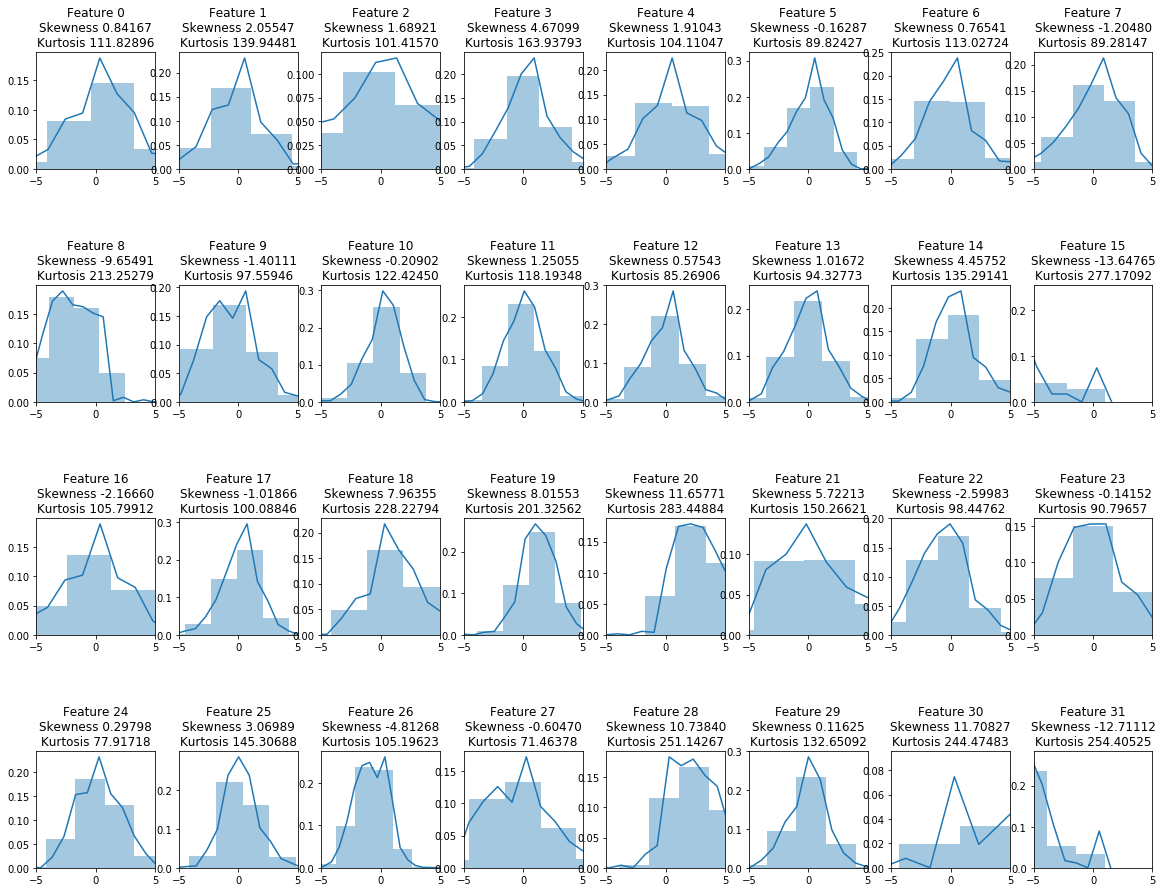

In [248]:
fig, ax =plt.subplots(4,8)
plt.subplots_adjust(hspace = 1.0)
k = 8
for i in range(0, 4):
    for j in range(0, 8):
        sample = x_train[[i*k+j]]
        _ = sns.distplot(sample, ax = ax[i][j])
        _.set_xlim([-5,5])
        _.set_title('Feature %s\nSkewness %.5f\nKurtosis %.5f'%(i * k + j, stats.skew(sample), stats.kurtosis(sample, fisher=False)))

#### Z-normalization of validation and test dataset

In [249]:
x_val.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.465540,0.796061,5.454650,3.160739,-0.163263,-0.169977,0.927149,-3.163914,-2.011448,-0.716415,...,1.669762,1.980212,1.935621,-0.178942,0.761249,2.214002,1.332721,-0.702374,15.849768,-6.048193
1,0.442944,0.469243,0.423951,0.383644,0.554251,0.354858,0.749578,0.678572,0.900466,0.992711,...,0.108364,0.735954,0.708467,0.772971,0.397758,0.627435,0.482952,0.944966,0.305257,0.221132
2,5.124625,0.548119,1.222178,1.825330,0.869077,-0.277510,-0.198669,-0.860529,-1.320002,3.756419,...,-2.361499,-2.940606,0.351758,0.431302,0.884826,-2.330672,3.864563,2.178052,5.041189,-3.350370
3,1.546282,-0.074273,-0.631636,-0.145413,0.769972,-0.167917,-0.541224,3.623893,-1.644867,-2.196459,...,-1.791086,-3.978795,2.439378,2.406600,-1.065816,-3.343823,4.014589,1.179326,9.791156,-5.262711
4,1.046102,-1.081003,3.395489,1.398418,3.910238,0.634105,-1.518325,-1.051852,-4.097343,2.729359,...,-4.174743,-3.769089,0.387395,-1.499142,-2.631245,-1.466390,2.504268,2.188549,6.253123,-4.680126


In [250]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,2.555977,-2.720460,1.672216,-3.393868,-6.327974,-0.547800,-2.763011,-0.521947,3.619816,-2.105260,...,0.292418,-1.858114,-0.126382,0.706767,2.649103,2.207731,-3.105171,0.897473,-0.088151,0.842523
1,-2.774910,-3.119226,3.293353,-1.249152,2.730268,0.331223,-3.494560,-3.063194,-5.839297,0.891183,...,-1.310905,1.884990,-0.043350,-1.316244,-1.501682,5.849676,3.582800,-1.538807,11.319177,-4.059913
2,-0.655637,-0.687742,2.660314,1.951835,-0.209924,-0.529265,0.245131,0.081344,-4.489836,-2.624428,...,-0.806764,0.792622,-1.192688,1.420621,-0.849695,1.766178,1.641221,-1.029102,13.516311,-4.529408
3,-2.881509,-3.502574,-3.544043,0.762973,0.137045,0.740605,-0.469609,-0.651034,-5.489251,-4.630768,...,-0.852238,-2.167860,-1.247580,1.652576,1.025628,2.114268,5.569886,0.611446,8.182000,-6.282930
4,-1.602858,0.338170,7.323076,0.133497,1.776318,-6.227641,6.522235,-5.368119,12.789734,2.567756,...,0.107556,-5.184515,0.332250,-1.209527,-1.643285,3.927981,-1.273856,-6.037074,-0.734845,4.025283


#### Ploting distributions of features after z-normalization

Used mean and std from training dataset to do the z-normalization on both validation and test dataset

##### Validaiton dataset

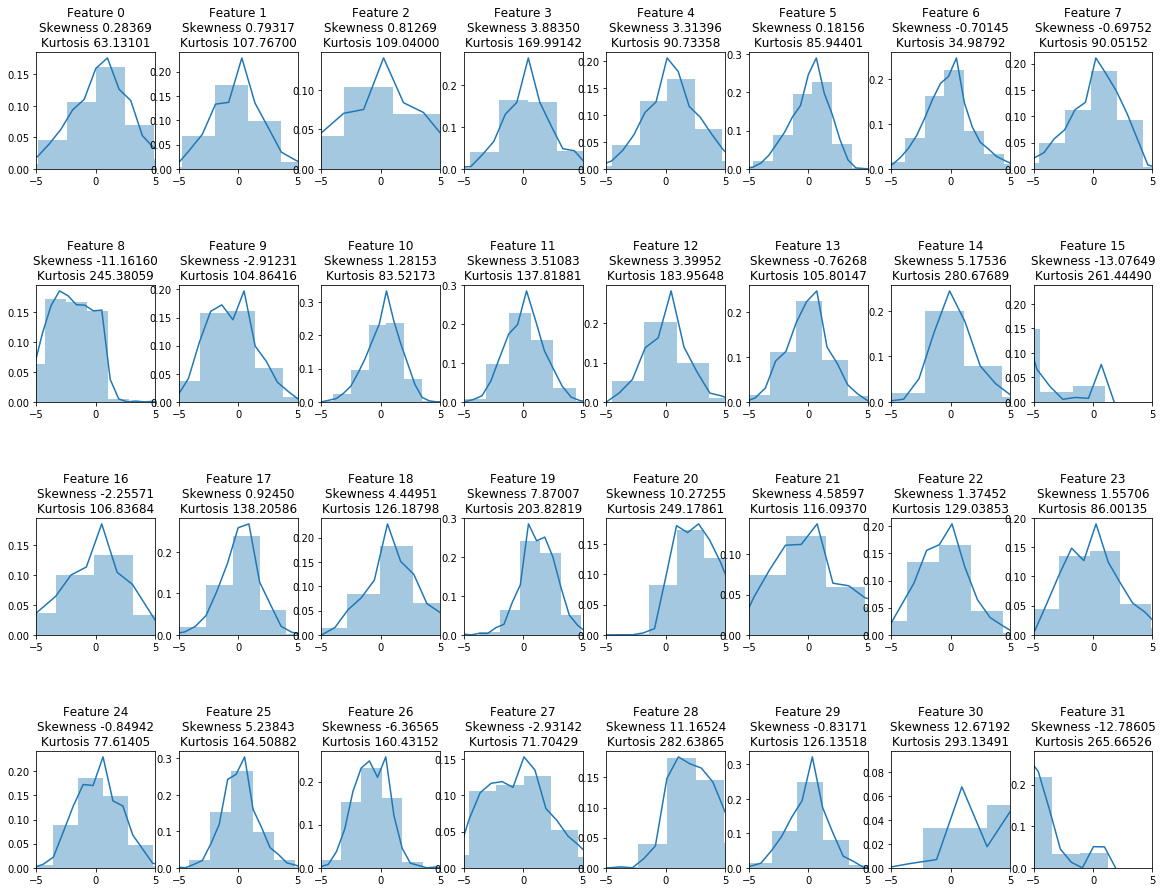

In [251]:
fig, ax =plt.subplots(4,8)
plt.subplots_adjust(hspace = 1.0)
k = 8
for i in range(0, 4):
    for j in range(0, 8):
        sample = x_val[[i*k+j]]
        _ = sns.distplot(sample, ax = ax[i][j])
        _.set_xlim([-5,5])
        _.set_title('Feature %s\nSkewness %.5f\nKurtosis %.5f'%(i * k + j, stats.skew(sample), stats.kurtosis(sample, fisher=False)))

##### Test dataset

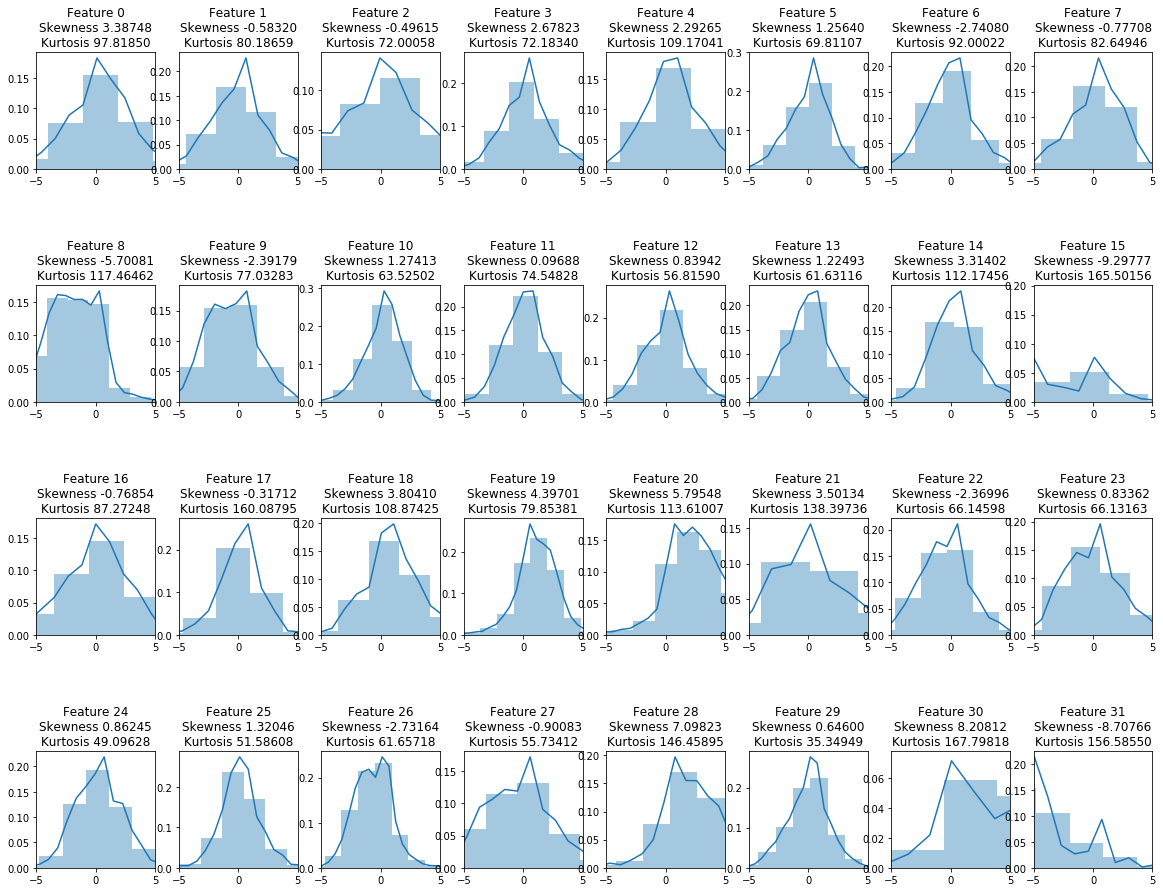

In [252]:
fig, ax =plt.subplots(4,8)
plt.subplots_adjust(hspace = 1.0)
k = 8
for i in range(0, 4):
    for j in range(0, 8):
        sample = x_test[[i*k+j]]
        _ = sns.distplot(sample, ax = ax[i][j])
        _.set_xlim([-5,5])
        _.set_title('Feature %s\nSkewness %.5f\nKurtosis %.5f'%(i * k + j, stats.skew(sample), stats.kurtosis(sample, fisher=False)))

### Creating new feature
There was used an encoder to create the dataset. It would be good to find an feature that reprezents the encoding mechanism.
We try to add the sum of difference between the mean as feature.

In [261]:
col_list = list(x_train)
col_list
train = x_train.as_matrix().astype(np.float)
train_y = y_train.as_matrix().astype(np.float)
val = x_val.as_matrix().astype(np.float)
test = x_test.as_matrix().astype(np.float)
train

array([[  2.40093112,   4.23543024,   7.1475234 , ...,   0.20424387,
         10.62377834,  -8.322258  ],
       [  2.95972516,  -2.14631107,   1.20110016, ...,   3.08239119,
          6.12282412,  -2.65656461],
       [  3.54354239,  -0.75394499,   0.45901018, ...,   0.86749715,
          6.58855057,  -6.27946854],
       ..., 
       [  2.11357869,  -0.92704322,   1.89997604, ...,   2.60588087,
          9.26818422,  -3.84593502],
       [  2.17072892,   4.76683044,   1.28608322, ...,  -0.18716443,
         10.33189583,  -7.79438686],
       [ -3.21171172,   1.44076253,   1.73076651, ...,  -2.87664351,
         10.40825848,  -6.76536052]])

In [262]:
# for training set
col = []
for i in range(0, x_train.shape[0]):
    col.append(np.sum(train[i,:] - scaler.mean_))
x_train['sum'] = col

# for validation set
col = []
for i in range(0, x_val.shape[0]):
    col.append(np.sum(val[i,:] - scaler.mean_))
x_val['sum'] = col

# for test set
col = []
for i in range(0, x_test.shape[0]):
    col.append(np.sum(test[i,:] - scaler.mean_))
x_test['sum'] = col

In [263]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,sum
0,2.400931,4.235430,7.147523,0.455781,-1.471710,0.368072,1.402726,3.231591,-1.111184,2.542668,...,0.081948,0.934971,0.988862,-2.817641,0.573825,3.931404,0.204244,10.623778,-8.322258,9.796911
1,2.959725,-2.146311,1.201100,4.206000,6.006231,1.064849,-1.838940,-0.227245,-0.346572,-0.451681,...,-1.047564,-1.498405,-0.921323,-0.384467,-1.260944,-0.721455,3.082391,6.122824,-2.656565,-0.240175
2,3.543542,-0.753945,0.459010,1.193610,4.166587,1.610900,-3.181179,-0.414485,-3.642286,0.527908,...,-0.667491,-2.781279,0.389482,-3.455173,0.395151,1.614165,0.867497,6.588551,-6.279469,-11.220550
3,-2.940113,1.279881,-2.462053,-0.744649,-1.845080,-2.705489,1.125120,-0.839736,-3.896343,-1.120876,...,-0.576021,3.706526,1.195011,-1.887120,-0.813390,-0.098769,0.525311,12.889137,-5.339454,-8.460616
4,6.907914,-1.035285,-1.841294,-0.060504,4.320388,2.423103,-5.194417,-0.937909,-4.159663,4.763647,...,1.529124,-2.930810,0.347728,-3.324413,3.475989,4.956617,0.037510,5.432440,-2.220027,84.357128


In [264]:
x_val.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,sum
0,-1.465540,0.796061,5.454650,3.160739,-0.163263,-0.169977,0.927149,-3.163914,-2.011448,-0.716415,...,1.980212,1.935621,-0.178942,0.761249,2.214002,1.332721,-0.702374,15.849768,-6.048193,23.002547
1,0.442944,0.469243,0.423951,0.383644,0.554251,0.354858,0.749578,0.678572,0.900466,0.992711,...,0.735954,0.708467,0.772971,0.397758,0.627435,0.482952,0.944966,0.305257,0.221132,11.407339
2,5.124625,0.548119,1.222178,1.825330,0.869077,-0.277510,-0.198669,-0.860529,-1.320002,3.756419,...,-2.940606,0.351758,0.431302,0.884826,-2.330672,3.864563,2.178052,5.041189,-3.350370,-0.285663
3,1.546282,-0.074273,-0.631636,-0.145413,0.769972,-0.167917,-0.541224,3.623893,-1.644867,-2.196459,...,-3.978795,2.439378,2.406600,-1.065816,-3.343823,4.014589,1.179326,9.791156,-5.262711,2.207991
4,1.046102,-1.081003,3.395489,1.398418,3.910238,0.634105,-1.518325,-1.051852,-4.097343,2.729359,...,-3.769089,0.387395,-1.499142,-2.631245,-1.466390,2.504268,2.188549,6.253123,-4.680126,-6.115420


In [265]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,sum
0,2.555977,-2.720460,1.672216,-3.393868,-6.327974,-0.547800,-2.763011,-0.521947,3.619816,-2.105260,...,-1.858114,-0.126382,0.706767,2.649103,2.207731,-3.105171,0.897473,-0.088151,0.842523,0.402502
1,-2.774910,-3.119226,3.293353,-1.249152,2.730268,0.331223,-3.494560,-3.063194,-5.839297,0.891183,...,1.884990,-0.043350,-1.316244,-1.501682,5.849676,3.582800,-1.538807,11.319177,-4.059913,2.094043
2,-0.655637,-0.687742,2.660314,1.951835,-0.209924,-0.529265,0.245131,0.081344,-4.489836,-2.624428,...,0.792622,-1.192688,1.420621,-0.849695,1.766178,1.641221,-1.029102,13.516311,-4.529408,12.263020
3,-2.881509,-3.502574,-3.544043,0.762973,0.137045,0.740605,-0.469609,-0.651034,-5.489251,-4.630768,...,-2.167860,-1.247580,1.652576,1.025628,2.114268,5.569886,0.611446,8.182000,-6.282930,-6.451120
4,-1.602858,0.338170,7.323076,0.133497,1.776318,-6.227641,6.522235,-5.368119,12.789734,2.567756,...,-5.184515,0.332250,-1.209527,-1.643285,3.927981,-1.273856,-6.037074,-0.734845,4.025283,-6.454246


Tvorba inych crt nas nenapadlo. Dalo by sa este pouzit dekoder a pozriet sa ako vyzera dekodovany obrazok a z urcitej casti vybrat niektore hlavne crty. 

# Feature selection

#### Pomocou nahodnych lesov

In [184]:
from sklearn.ensemble import ExtraTreesClassifier # tu sa da pouzit aj random forrest
from sklearn.feature_selection import SelectFromModel

In [187]:
clf = ExtraTreesClassifier()
clf = clf.fit(x_train, y_train)
clf.feature_importances_

c:\users\thedarkside\mnist_set\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([ 0.0298908 ,  0.0231545 ,  0.03069865,  0.02638417,  0.02675004,
        0.02779166,  0.02980141,  0.02584105,  0.02749079,  0.02878198,
        0.0272529 ,  0.02519369,  0.02757898,  0.02585734,  0.02612596,
        0.03854055,  0.03665174,  0.02563477,  0.03353988,  0.02666149,
        0.02856938,  0.02724846,  0.02801629,  0.02574536,  0.02616783,
        0.02572648,  0.02753365,  0.02884131,  0.03205998,  0.02329668,
        0.03635135,  0.04568576,  0.07513512])

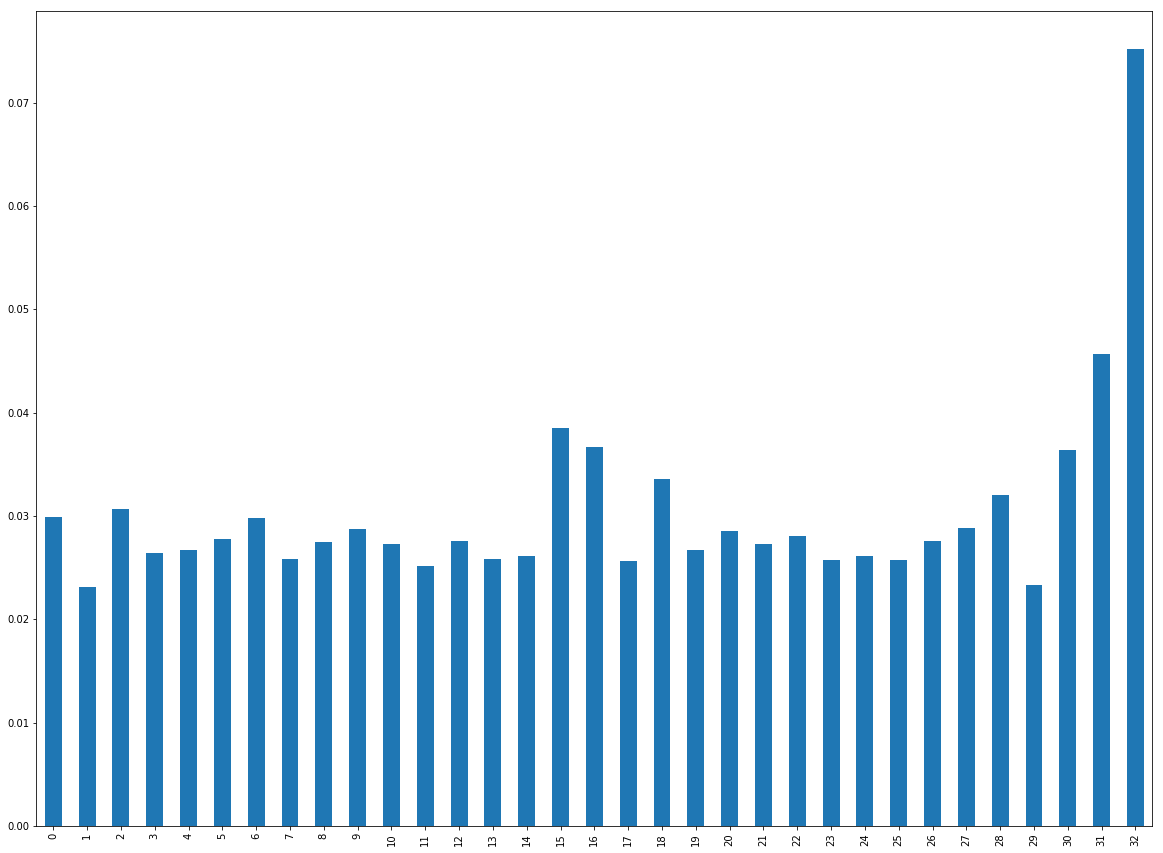

In [188]:
pd.Series(clf.feature_importances_).plot(kind='bar')

Graf zobrazuje dolezitost atributor po vybere pomocou nahodnych lesov. Ako mozeme vidiet nami vytvoreni atribut sa ukazuje ako dobra volba.

In [191]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x_train)
X_new.shape

(100000, 8)

Novy model by bol potom vytvoreny len na zaklade najlepsich atributov.

### Vyvazenost datasetu

In [192]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5).fit(x_train, y_train)
tree.score(x_val, y_val)

0.62029999999999996

In [194]:
from sklearn.dummy import DummyClassifier
    
dummy = DummyClassifier(strategy='constant', constant=0).fit(x_train, y_train)
dummy.score(x_val, y_val)

0.49754999999999999

In [195]:
len_y = len(y_val)
temp_1 = len(list(filter(lambda x: x==0, y_val)))

percentage = float(temp_1) / float(len_y)

print(percentage)

5e-05


Skusme inu metriku

In [196]:
from sklearn.metrics import f1_score

f1_score(y_val, tree.predict(x_val))

0.39682287529785548

In [197]:
from sklearn.metrics import f1_score

f1_score(y_val, dummy.predict(x_val))

c:\users\thedarkside\mnist_set\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.0

Vidime ze vyvazenost datasetu moze byt problem pri predikcii. Pri vytvarani klasifikatorov budeme preto potrebovat nastavovat
s rozvahou parametre a taktiez rozhodovaciu hranicu.

#### Skusme pouzit na vyber atributov najskor filtre

Najjednoduchsie je vyhodit atributy, ktore maju vsade rovnake hodnoty

In [199]:
from sklearn.feature_selection import VarianceThreshold

In [202]:
selector = VarianceThreshold(threshold=0.0)
selector.fit_transform(x_train).shape

(100000, 33)

Nie su tam ziadne. Mohli by sme posunut treshold o urcitu mieru ale nejdeme to robit. Vyhodou filtrou je ze su rychle, ale zbavujeme sa tym urcitych vlastnosti datasetu

### Vyberme atributy na zaklade zavislosti atributu a predikovanej hodnoty

Existuju rozne metody. ale my nechceme skusat po jednom urcite mnozstvo aj ked je to rychle, mozeme stratit urcite vlastnosti datasetu, ktore by sme potrebovali. Preto pouzijeme racej
urcity druh wrappru.

### Hladame podmnozinu atributov, na ktorej bude model davat najlepsie vysledky

Problem
Ak mame dataset s N atributmi, tak pocet roznych podmnozin je $2^N$ v nasom pripade je to pocet kombinacii velkost integeru.

### Lepsia moznost pre tento dataset pre modely ako SVM, Random Forest je nechat na model nech si sam vyberie najlepsie atributy

In [204]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
x_train.shape

(100000, 33)

In [205]:
clf = RandomForestClassifier()
clf = clf.fit(x_train, y_train)
clf.feature_importances_

c:\users\thedarkside\mnist_set\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


array([ 0.02949293,  0.02268667,  0.03764251,  0.02761157,  0.03244153,
        0.02471175,  0.02375917,  0.02638468,  0.03062551,  0.02759365,
        0.02961338,  0.02610251,  0.03096117,  0.02425608,  0.02757565,
        0.04788177,  0.03581593,  0.02481622,  0.02783501,  0.02567624,
        0.02628602,  0.03013008,  0.03119343,  0.02518368,  0.02286551,
        0.02213127,  0.0236851 ,  0.02756264,  0.02958831,  0.02451678,
        0.03230826,  0.04130674,  0.07975824])

In [206]:
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(x_train)
X_new.shape

(100000, 10)

### Skusme ale pouzit aj SFS 
pouzitie SFS sa nachadza v dalsom notebooku kde trenujeme klasifikatory

